In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

in two dimensions.

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
import time

In [8]:
sol = Solver(imax=100, jmax=100, kmax=1000, use_morton=True)

Creating initial gaussian condition...
Done!
Creating advection operator...
Done!
Creating diffusion operator...
Done!


It takes *soooooo* long to make these operators...bleh. Let's see if we can speed it up...if we want to do it right, we really have to initialize the elements in a more intelligent manner...

In [9]:
result = sol.run()

In [12]:
np.where(result < 0)

(array([ 0,  0,  0, ..., 99, 99, 99]),
 array([ 0,  0,  0, ..., 41, 41, 41]),
 array([ 481,  482,  483, ...,  998,  999, 1000]))

Ok yeah there are problems lol.

In [14]:
ruh_rohs = np.where(result < 0)[0]

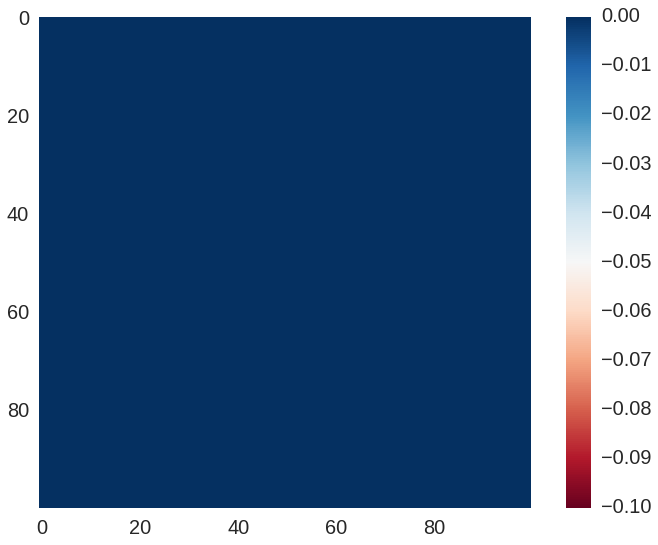

In [11]:
ski.io.imshow(result[:, :, 1000])
plt.grid(False)
plt.clim([-.1, 0])

wtf lol. It's more important that I debug this error first...why are things no longer looping appropriately as well?

Somehow, advection is screwing things up. Because diffusion looks beautiful.